# 線型多段法の安定領域

In [1]:
import numpy as np
from numpy import cos, sin, exp, pi
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('notebook', 'whitegrid', 'dark', font_scale=2, rc={'lines.linewidth': 2, 'grid.linestyle': '-'})

## 陽的Adams法

2nd order explicit Adams 

In [2]:
N = 256
u2 = np.zeros(N+1)
v2 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = (k**2 - k) / (1.5*k - 0.5)
    u2[n] = np.real(z)
    v2[n] = np.imag(z)

3rd order explicit Adams

In [3]:
u3 = np.zeros(N+1)
v3 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = k**2*(k - 1) * 12 / (23*k**2 - 16*k + 5)
    u3[n] = np.real(z)
    v3[n] = np.imag(z)

4th order explicit Adams

In [4]:
u4 = np.zeros(N+1)
v4 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = k**3*(k - 1) * 24 / (55*k**3 - 59*k**2 + 37*k - 9)
    u4[n] = np.real(z)
    v4[n] = np.imag(z)

安定領域をプロット

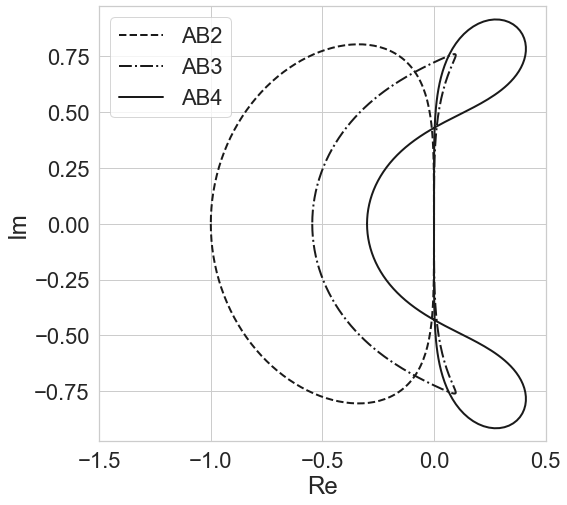

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xlim(-1.5,0.5)
ax.set_ylim(-1,1)
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.plot(u2, v2, '--k', label='AB2')
ax.plot(u3, v3, '-.k', label='AB3')
ax.plot(u4, v4, '-k', label='AB4')
ax.legend()
# fig.savefig('stability_AB.pdf', bbox_inches='tight')

## 陰的Adams法

In [6]:
N = 256
U2 = np.zeros(N+1)
V2 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = (k - 1) * 2 / (k+1)
    U2[n] = np.real(z)
    V2[n] = np.imag(z)

In [7]:
N = 256
U3 = np.zeros(N+1)
V3 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = k*(k - 1) * 12 / (5*k**2 + 8 * k - 1)
    U3[n] = np.real(z)
    V3[n] = np.imag(z)

In [8]:
N = 256
U4 = np.zeros(N+1)
V4 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = k**2*(k - 1) * 24 / (9*k**3 + 19 * k**2 - 5 * k + 1)
    U4[n] = np.real(z)
    V4[n] = np.imag(z)

In [9]:
N = 256
U5 = np.zeros(N+1)
V5 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = k**3*(k - 1) * 720 / (251*k**4 + 646 * k**3 - 264 * k**2 + 106 * k - 19)
    U5[n] = np.real(z)
    V5[n] = np.imag(z)

閉曲線の内側が安定領域

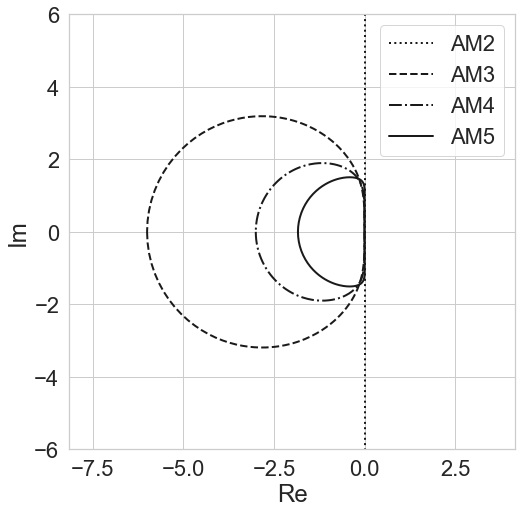

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.axis('equal')
#ax.set_xlim(-1.5,0.5)
ax.set_ylim(-6,6)
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.plot(U2, V2, ':k', label='AM2')
ax.plot(U3, V3, '--k', label='AM3')
ax.plot(U4, V4, '-.k', label='AM4')
ax.plot(U5, V5, '-k', label='AM5')
ax.legend()
# fig.savefig('stability_AM.pdf', bbox_inches='tight')

## BDF公式

In [11]:
bdf1 = np.array([1, -1])
bdf2 = np.array([1, -4/3, 1/3]) / (2/3)
bdf3 = np.array([1, -18/11, 9/11, -2/11]) / (6 / 11)
bdf4 = np.array([1, -48/25, 36/25, -16/25, 3/25]) / (12 / 25)
bdf5 = np.array([1, -300/137, 300/137, -200/137, 75/137, -12/137])/(60/137)
bdf6 = np.array([1, -360/147, 450/147, -400/147, 225/147, -72/147, 10/147]) / (60/147)

In [12]:
N = 256
BDF_U1 = np.zeros(N+1)
BDF_V1 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = np.dot(bdf1, np.array([k**(-s) for s in range(2)]))
    BDF_U1[n] = np.real(z)
    BDF_V1[n] = np.imag(z)

In [13]:
N = 256
BDF_U2 = np.zeros(N+1)
BDF_V2 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = np.dot(bdf2, np.array([k**(-s) for s in range(3)]))
    BDF_U2[n] = np.real(z)
    BDF_V2[n] = np.imag(z)

In [14]:
N = 256
BDF_U3 = np.zeros(N+1)
BDF_V3 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = np.dot(bdf3, np.array([k**(-s) for s in range(4)]))
    BDF_U3[n] = np.real(z)
    BDF_V3[n] = np.imag(z)

In [15]:
N = 256
BDF_U4 = np.zeros(N+1)
BDF_V4 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = np.dot(bdf4, np.array([k**(-s) for s in range(5)]))
    BDF_U4[n] = np.real(z)
    BDF_V4[n] = np.imag(z)

In [16]:
N = 256
BDF_U5 = np.zeros(N+1)
BDF_V5 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = np.dot(bdf5, np.array([k**(-s) for s in range(6)]))
    BDF_U5[n] = np.real(z)
    BDF_V5[n] = np.imag(z)

In [17]:
N = 256
BDF_U6 = np.zeros(N+1)
BDF_V6 = np.zeros(N+1)
for n in range(0, N+1):
    k = exp(1j * (-pi + 2*pi * n / N))
    z = np.dot(bdf6, np.array([k**(-s) for s in range(7)]))
    BDF_U6[n] = np.real(z)
    BDF_V6[n] = np.imag(z)

閉曲線の外側が絶対安定領域

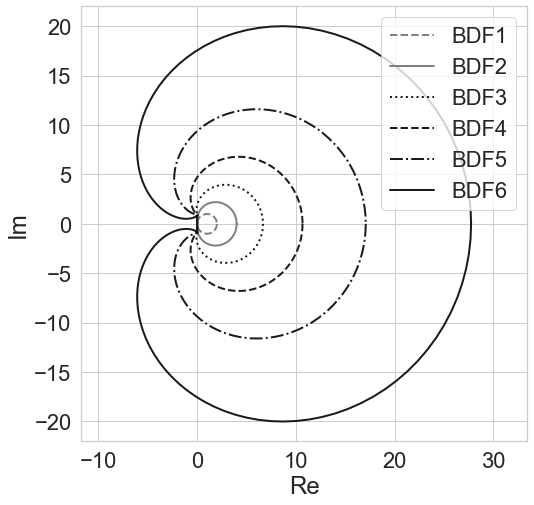

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.plot(BDF_U1, BDF_V1, '--', color='gray', label='BDF1')
ax.plot(BDF_U2, BDF_V2, '-', color='gray',label='BDF2')
ax.plot(BDF_U3, BDF_V3, ':k', label='BDF3')
ax.plot(BDF_U4, BDF_V4, '--k', label='BDF4')
ax.plot(BDF_U5, BDF_V5, '-.k', label='BDF5')
ax.plot(BDF_U6, BDF_V6, '-k', label='BDF6')
ax.legend()
# fig.savefig('stability_BDF.pdf', bbox_inches='tight')